# Visão Computacional - Lista 5

Aqui serão resolvidas as atividades da terceira lista de Visão Computacional pelo aluno Sillas Rocha da Costa, começaremos realizando alguns imports:

In [1]:
import cv2 as cv2
import numpy as np
from matplotlib import pyplot as plt

# Exercício 1 - Detecção de cantos

a) -

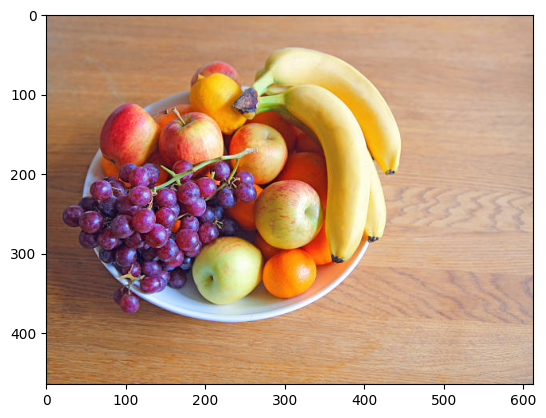

In [2]:
img = cv2.imread('./frutas.jpg')
# img = img[:,:,::-1]
plt.imshow(img[:,:,::-1])
plt.show()

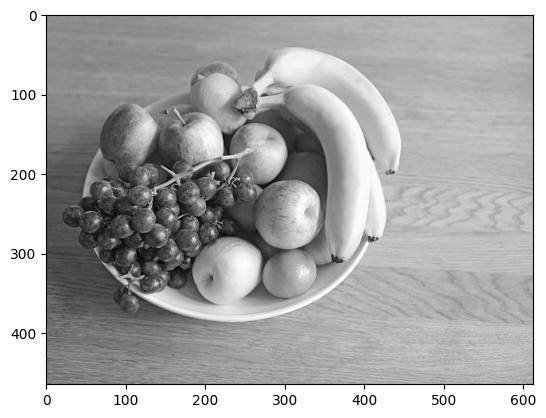

In [3]:
impb = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(impb, cmap='gray')
plt.show()

In [4]:
def HarrisCornerDetector(image, blockSize, ksize, k=0.06):
    #image é uma imagem em tons de cinza
    #blockSize é o tamanho da vizinhança considerada para a detecção de cada canto
    #ksize é o tamanho do filtro de Sobel usado para calcular os gradientes horizontal e vertical
    #k é um parâmetro livre do detector de Harris na equação
    #retorna uma imagem binária com o score de cada pixel
    nlin, ncol = image.shape
    image = image/255

    Ix = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=ksize)
    Iy = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=ksize)
    Ix2 = Ix ** 2
    Iy2 = Iy ** 2
    Ixy = Ix * Iy

    Rresult = np.zeros((nlin, ncol))
    cont = 0
    for lin in range(blockSize, nlin-blockSize):
        for col in range(blockSize, ncol-blockSize):
            Ix2_block = Ix2[lin - blockSize: lin + blockSize + 1, col - blockSize: col + blockSize + 1]
            Iy2_block = Iy2[lin - blockSize: lin + blockSize + 1, col - blockSize: col + blockSize + 1]
            Ixy_block = Ixy[lin - blockSize: lin + blockSize + 1, col - blockSize: col + blockSize + 1]
     
            Sxx = np.sum(Ix2_block)
            Syy = np.sum(Iy2_block)
            Sxy = np.sum(Ixy_block)

            det = Sxx*Syy - Sxy**2
            trace = Sxx + Syy
            
            R = det - k * (trace**2)
            Rresult[lin, col] = R
            
            if R > 0.01:
                cont += 1
    print(cont)
    return Rresult

32374


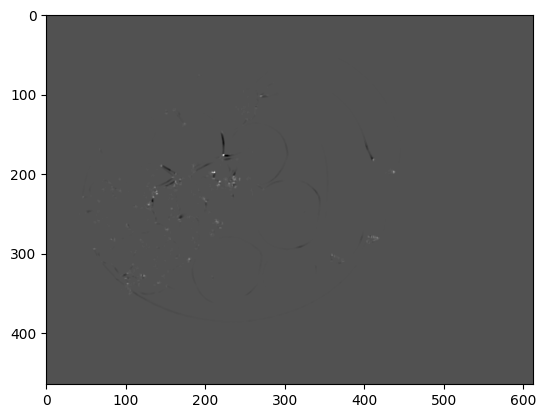

In [5]:
Rresult = HarrisCornerDetector(impb, 1, 3, 0.06)
plt.imshow(Rresult, cmap='gray')
plt.show()

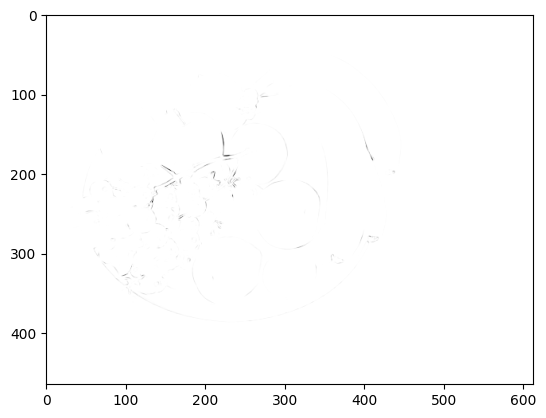

In [6]:
RresultCV = cv2.cornerHarris(impb, 1, 3, 0.06)
plt.imshow(RresultCV, cmap='gray')
plt.show()

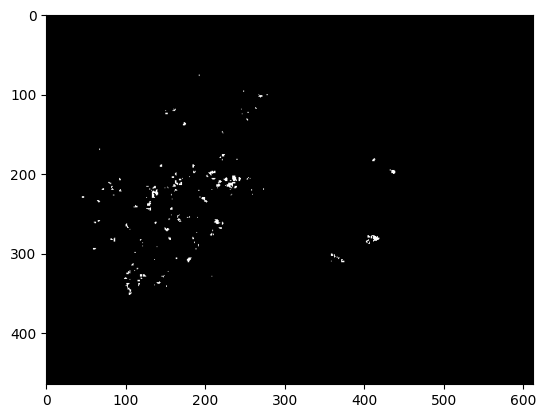

In [7]:
npoints = 1000
PointsInterest = np.zeros(impb.shape)
top_indices = np.argpartition(Rresult.flatten(), -npoints)[-npoints:]
top_row_indices, top_col_indices = np.unravel_index(top_indices, impb.shape)
for i in range(npoints):
    PointsInterest[top_row_indices[i], top_col_indices[i]] = 1

plt.imshow(PointsInterest, cmap='gray')
plt.show()

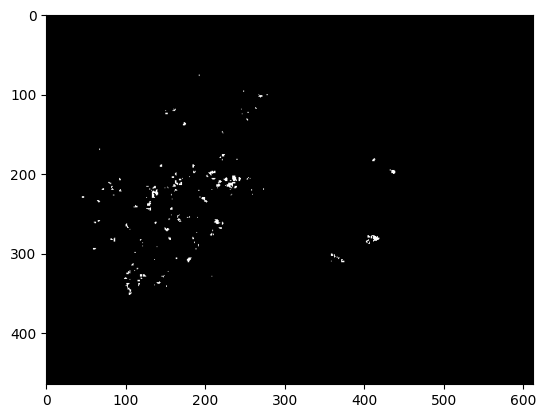

In [8]:
PointsInterestcv = np.zeros(impb.shape)
top_indicescv = np.argpartition(Rresult.flatten(), -npoints)[-npoints:]
top_row_indicescv, top_col_indicescv = np.unravel_index(top_indicescv, impb.shape)
for i in range(npoints):
    PointsInterestcv[top_row_indicescv[i], top_col_indicescv[i]] = 1

plt.imshow(PointsInterestcv, cmap='gray')
plt.show()

b) -

In [9]:
# Encontre os pontos de máximo usando Non Maximal Supression (máximos em janelas 3x3)
def NonMaximalSupression(im, window_size=3, scalar_filter:float=0.01):
    nl = im.shape[0]
    nc = im.shape[1]
    maximos = list()
    for lin in range(int(window_size/2), nl-window_size + int(window_size/2)):
        for col in range(int(window_size/2), nc-window_size + int(window_size/2)):
            window = im[lin-int(window_size/2): lin + (window_size - int(window_size/2)) + 1, col - int(window_size/2): col + (window_size - int(window_size/2)) + 1]
            if im[lin, col] == np.max(window):
                if np.max(window) > scalar_filter * np.max(im):
                    maximos.append((lin, col))

    return maximos

c) -

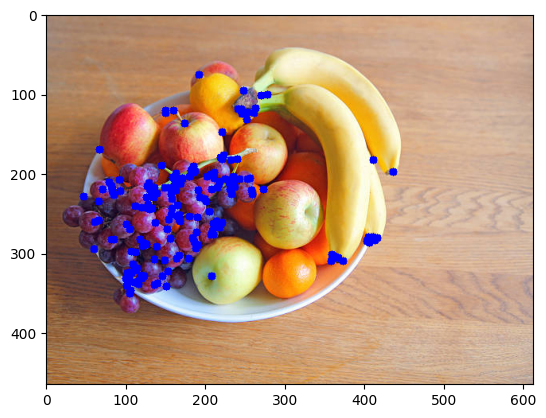

In [10]:
# Meu resultado
maximos = NonMaximalSupression(Rresult, 3, 0.02)

img_maximos = cv2.imread('./frutas.jpg')

for lin, col in maximos:
    cv2.circle(img_maximos, center=(col, lin), radius = 5, color=(255,0,0), thickness = -1)

plt.imshow(img_maximos[:,:,::-1])
plt.show()

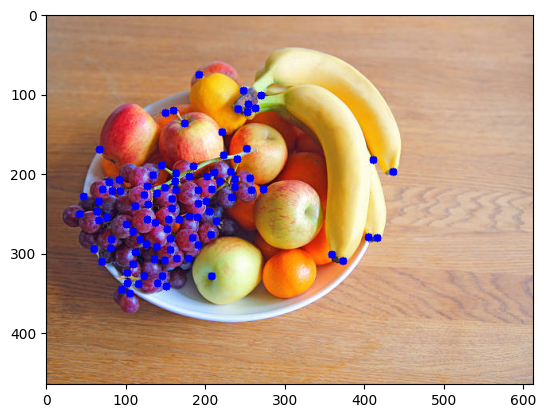

In [11]:
# Resultado Open CV
features = cv2.goodFeaturesToTrack(image=impb, maxCorners=100, 
            qualityLevel=0.01, minDistance = 10, blockSize=3, useHarrisDetector=True, k=0.06)
for i in features:
    x,y = i.ravel()
    cv2.circle(img = img,center = (int(x),int(y)),radius = 5,color=(255,0,0),thickness = -1)
plt.imshow(img[:,:,::-1])
plt.show()

# 2 - Patches e correspondência entre pontos